### Imports

In [5]:
import numpy as np
from numpy.random import normal
import scipy
import pandas as pd
import seaborn as sns
import sys #sys.maxsize

### Data Generation

#### Helper Functions

In [6]:
def gen_points(n_points, x_center, y_center, spread, cluster_id):
    x0 = [1] * n_points
    x = normal(loc = x_center, scale = spread, size = n_points)
    y = normal(loc = y_center, scale = spread, size = n_points)
    c = [cluster_id] * n_points
    return list(zip(x0, x, y, c))

#### Configuration

In [7]:
cl_size = 50
cl_spread = 1
cl_centers = [(5, 5), (10, 10)]

#### DataFrame Generation

In [8]:
df = None
cols = ['x0', 'x', 'y', 'cluster_id']
for i, (c_x, c_y) in enumerate(cl_centers):
    points = gen_points(cl_size, c_x, c_y, cl_spread, i)                          
    if df is None:
        df = pd.DataFrame(points, columns = cols)
    else:
        df2 = pd.DataFrame(points, columns = cols)
        df = df.append(df2, ignore_index = True)

C:\Users\jeete\.conda\envs\Python37Env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='x', ylabel='y'>

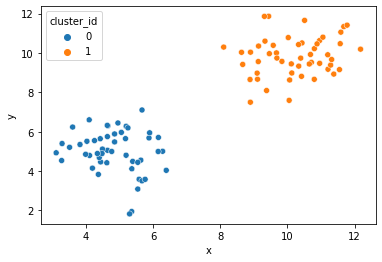

In [9]:
sns.scatterplot("x", "y", "cluster_id", data = df)

### Program

#### Prepare X, y from input; Initialize weights and bias

In [10]:
#inputs
X = df.loc[:, ['x0', 'x', 'y']].values
y = df.loc[:, 'cluster_id'].values
y = np.reshape(y, (2*cl_size, 1))
#initialize weights and biases to random values
#W[0] is the bias
W = normal(loc = 0, scale = 1, size = (3, 1))
print('X:', X.shape, 'y:', y.shape, 'W:', W.shape)

X: (100, 3) y: (100, 1) W: (3, 1)


#### Learning and Cost Functions Definition

In [11]:
def cost_and_gradient(X, y, W):
    Z = np.dot(X, W) #input to the activation function
    a = scipy.special.expit(Z) #activation
    gradient = np.dot(np.transpose(X), (a-y))
    #RuntimeWarning: divide by zero encountered in log
    #RuntimeWarning: invalid value encountered in multiply
    #use scipy.special to avoid divide-by-zero error - didn't work
    #try adding an infinitesimal number
    inf_small = 0.0000001
    #cost L
    L = (-1/(X.shape[0]))*np.sum((y*np.log(a+inf_small) + \
                        (1-y)*np.log(1-a+inf_small)))
    return L, gradient

In [12]:
#learning based on gradient descent
def gradient_descent(X, y, W, lrate = 0.01):
    W_new = W.copy()
    old_loss = sys.maxsize
    new_loss, grads = cost_and_gradient(X, y, W_new)
    #while the loss is reducing by a good enough margin
    i = 0 #for controlled printing
    while abs(old_loss - new_loss) > 0.0001:
        #update the weights and bias in the direction of the gradient
        W_new = W_new - (lrate*grads)
        #calculate the new loss
        old_loss = new_loss
        new_loss, grads = cost_and_gradient(X, y, W_new)
        if (i%75 == 0):
            print ('Loss:', new_loss)
        i += 1
        #print ('Loss:', new_loss)
    return W_new

#### Invocation

In [13]:
#call gradient descent to learn the new weights
W_new = gradient_descent(X, y, W, 0.0001)
print ('Old Weights:\n', W)
print ('New Weights:\n', W_new)
print ('Done')

Loss: 7.7131893055403
Loss: 0.8145896581259626
Loss: 0.7893308117084652
Loss: 0.7656709331042987
Loss: 0.7432733863825634
Loss: 0.7219843916979417
Loss: 0.7016831926580147
Loss: 0.6822744486920478
Loss: 0.6636822127224901
Loss: 0.6458452345189986
Loss: 0.6287133404059502
Loss: 0.6122446695371763
Loss: 0.5964035822071907
Loss: 0.5811590898384905
Loss: 0.5664836864603556
Loss: 0.5523524868373025
Loss: 0.5387425970744538
Loss: 0.5256326600899491
Loss: 0.5130025314746355
Loss: 0.5008330515972501
Loss: 0.48910588791399917
Loss: 0.4778034277633273
Loss: 0.46690870683969765
Loss: 0.4564053623396515
Loss: 0.446277602694257
Loss: 0.43651018803136254
Loss: 0.42708841719813045
Loss: 0.4179981184383197
Loss: 0.40922564175491305
Loss: 0.40075785167268363
Loss: 0.39258211960723827
Loss: 0.38468631539417275
Loss: 0.37705879777114343
Old Weights:
 [[1.45731923]
 [1.68088148]
 [1.51110881]]
New Weights:
 [[-2.00252688]
 [ 0.38451123]
 [-0.05344295]]
Done


#### Verification

In [14]:
def pred(X, W):
    return scipy.special.expit(np.dot(X, W))

y_pred = pred(X, W_new)
print(y_pred)
#print('Cluster 0:\n', y_pred[:10])
#print('Cluster 1:\n', y_pred[90:])

[[0.41621066]
 [0.39134372]
 [0.38681782]
 [0.48901387]
 [0.46051193]
 [0.45801881]
 [0.39446464]
 [0.38056587]
 [0.44985954]
 [0.5365519 ]
 [0.48464343]
 [0.42249199]
 [0.39288337]
 [0.4068463 ]
 [0.42220549]
 [0.27213564]
 [0.48031499]
 [0.28311983]
 [0.51521133]
 [0.4886173 ]
 [0.36636992]
 [0.33662596]
 [0.38927395]
 [0.354054  ]
 [0.52404009]
 [0.34031327]
 [0.47316224]
 [0.264033  ]
 [0.32599518]
 [0.49119494]
 [0.37143411]
 [0.36956821]
 [0.3631767 ]
 [0.35187829]
 [0.36629905]
 [0.36424999]
 [0.27906433]
 [0.37165572]
 [0.48837661]
 [0.25589133]
 [0.36809213]
 [0.49758677]
 [0.31456313]
 [0.43519638]
 [0.55966518]
 [0.4869334 ]
 [0.30635585]
 [0.32150821]
 [0.35573661]
 [0.50567501]
 [0.83783782]
 [0.85501422]
 [0.80470589]
 [0.86565181]
 [0.86779322]
 [0.73058663]
 [0.83268782]
 [0.82237314]
 [0.73450864]
 [0.83313063]
 [0.86839152]
 [0.84174797]
 [0.87530672]
 [0.75488452]
 [0.7297596 ]
 [0.82862282]
 [0.68586428]
 [0.73822229]
 [0.89420026]
 [0.80414767]
 [0.86016956]
 [0.73

#### Visualize Prediction

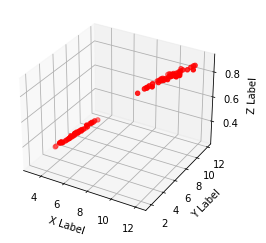

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X[:,1]  #[1,2,3,4,5,6,7,8,9,10]
y = X[:,2]  #[5,6,2,3,13,4,1,2,4,8]
z = pred(X, W_new)       #[2,3,3,3,5,7,9,11,9,10]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [16]:
import sys
print ('Python version is', sys.version)

Python version is 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
